# Linear Models<br>and Generalized Linear Models


## Week 8 Homework

---

### Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a ${MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).


#### [Optional] Q1 Extra: derive the following

Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*


## Q1 Answer



We are given the standard linear regression model
$
\mathbf{y} \mid \boldsymbol{\beta}, \sigma^2 \sim N\left(\mathbf{X}\boldsymbol{\beta},\, \sigma^2 \mathbf{I}\right)
$
with likelihood
$
p(\mathbf{y}\mid \mathbf{X}, \boldsymbol{\beta}, \sigma^2)
= (2\pi\sigma^2)^{-n/2} \exp{\Biggl(-\frac{1}{2\sigma^2} (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})\Biggr)}.
$

Furthermore, the prior for $\boldsymbol{\beta}$ is assumed to be
$
\boldsymbol{\beta} \sim \mathrm{MVN}(\boldsymbol{\beta}_0,\, \Sigma_\beta),
$
with density
$
p(\boldsymbol{\beta}) = (2\pi)^{-p/2} |\Sigma_\beta|^{-1/2} \exp\!\Biggl(-\frac{1}{2} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\top \Sigma_\beta^{-1} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)\Biggr).
$

### **Part 1: Derivation of $p(\boldsymbol{\beta}\mid \mathbf{y}, \mathbf{X}, \sigma^2)$**

By Bayes' rule (ignoring normalizing constants) the posterior is proportional to the product of the likelihood and the prior:
$
p(\boldsymbol{\beta}\mid \mathbf{y}, \mathbf{X}, \sigma^2) \propto p(\mathbf{y}\mid \mathbf{X}, \boldsymbol{\beta}, \sigma^2) \, p(\boldsymbol{\beta}).
$
Substitute the expressions:
$
p(\boldsymbol{\beta}\mid \cdot) \propto \exp\!\Biggl( -\frac{1}{2\sigma^2} (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})
-\frac{1}{2} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\top \Sigma_\beta^{-1} (\boldsymbol{\beta}-\boldsymbol{\beta}_0) \Biggr).
$

We first expand the likelihood quadratic term.
Note that
$
(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})
=\mathbf{y}^\top\mathbf{y} - 2\,\boldsymbol{\beta}^\top\mathbf{X}^\top\mathbf{y} + \boldsymbol{\beta}^\top\mathbf{X}^\top\mathbf{X}\boldsymbol{\beta}.
$

Since terms independent of $\boldsymbol{\beta}$ can be absorbed into the normalizing constant, we keep only the terms involving $\boldsymbol{\beta}$:
$
-\frac{1}{2\sigma^2}\Bigl[-2\,\boldsymbol{\beta}^\top\mathbf{X}^\top\mathbf{y} + \boldsymbol{\beta}^\top\mathbf{X}^\top\mathbf{X}\boldsymbol{\beta}\Bigr]
-\frac{1}{2} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\top \Sigma_\beta^{-1} (\boldsymbol{\beta}-\boldsymbol{\beta}_0).
$

This simplifies to
$
-\frac{1}{2}\left\{ \boldsymbol{\beta}^\top \left(\frac{\mathbf{X}^\top\mathbf{X}}{\sigma^2} + \Sigma_\beta^{-1}\right) \boldsymbol{\beta} - 2\, \boldsymbol{\beta}^\top \left(\frac{\mathbf{X}^\top\mathbf{y}}{\sigma^2} + \Sigma_\beta^{-1}\boldsymbol{\beta}_0\right) \right\}.
$

Next, we complete the square.
Define
$$
\mathbf{A} \equiv \frac{\mathbf{X}^\top \mathbf{X}}{\sigma^2} + \Sigma_\beta^{-1} \quad \text{and} \quad \mathbf{b} \equiv \frac{\mathbf{X}^\top \mathbf{y}}{\sigma^2} + \Sigma_\beta^{-1}\boldsymbol{\beta}_0.
$$
Then the exponent becomes
$
-\frac{1}{2} \Bigl[ \boldsymbol{\beta}^\top \mathbf{A} \boldsymbol{\beta} - 2\, \boldsymbol{\beta}^\top \mathbf{b} \Bigr].
$
We complete the square by writing
$$
\boldsymbol{\beta}^\top \mathbf{A} \boldsymbol{\beta} - 2\, \boldsymbol{\beta}^\top \mathbf{b} = (\boldsymbol{\beta} - \mathbf{A}^{-1}\mathbf{b})^\top \mathbf{A} (\boldsymbol{\beta} - \mathbf{A}^{-1}\mathbf{b}) - \mathbf{b}^\top \mathbf{A}^{-1}\mathbf{b}.
$$
Discarding the constant $\mathbf{b}^\top \mathbf{A}^{-1}\mathbf{b}$ (since it does not depend on $\boldsymbol{\beta}$), we have:
$$
p(\boldsymbol{\beta}\mid \mathbf{y}, \mathbf{X}, \sigma^2) \propto \exp\!\Bigl( -\frac{1}{2} (\boldsymbol{\beta} - \mathbf{A}^{-1}\mathbf{b})^\top \mathbf{A} (\boldsymbol{\beta} - \mathbf{A}^{-1}\mathbf{b}) \Bigr).
$$

This is the kernel of a multivariate normal distribution with
$$
\text{Covariance: } \quad \Sigma_{\beta}^* = \mathbf{A}^{-1} = \left(\frac{\mathbf{X}^\top \mathbf{X}}{\sigma^2} + \Sigma_\beta^{-1}\right)^{-1}.
$$
$$
\text{Mean: } \quad \boldsymbol{\mu}_{\beta} = \mathbf{A}^{-1}\mathbf{b} = \Sigma_{\beta}^* \left(\frac{\mathbf{X}^\top\mathbf{y}}{\sigma^2} + \Sigma_\beta^{-1}\boldsymbol{\beta}_0\right),
$$
Thus, the posterior is
$
\boxed{
\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \sigma^2 \sim \mathrm{MVN}\!\left( \boldsymbol{\mu}_{\beta},\;
\Sigma_{\beta}^* \right).
}
$

### **Part 2: Derivation of the Posterior for $\sigma^2$**
I'm assuming we are continuing from Part 1 where we assumed a MVN prior and derived a posterior for $\beta$.

Assume that the model is given by
$
\mathbf{y} \mid \boldsymbol{\beta}, \sigma^2 \sim N\!\Bigl(\mathbf{X}\boldsymbol{\beta}, \, \sigma^2 \mathbf{I}\Bigr),
$
with likelihood
$
p(\mathbf{y}\mid \boldsymbol{\beta}, \sigma^2) \propto (\sigma^2)^{-n/2} \exp\!\left(-\frac{1}{2\sigma^2} (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})\right).
$

Suppose we place an inverse-gamma prior on $\sigma^2$.
$
\sigma^2 \sim \mathrm{Inv\text{-}Gamma}(\alpha^*, \beta^*),
$
whose density (ignoring constant factors) is
$
p(\sigma^2) \propto (\sigma^2)^{-(\alpha^*+1)} \exp\!\left(-\frac{\beta^*}{\sigma^2}\right).
$

The posterior for $\sigma^2$ given $\mathbf{y}$ (and conditional on $\boldsymbol{\beta}$ and $\mathbf{X}$) is proportional to the likelihood and prior.
$
p(\sigma^2 \mid \mathbf{y}, \boldsymbol{\beta}, \mathbf{X}) \propto p(\mathbf{y}\mid \boldsymbol{\beta}, \sigma^2)\, p(\sigma^2).
$

Substitute the expressions:
$$
p(\sigma^2 \mid \cdot) \propto (\sigma^2)^{-n/2} \exp\!\left(-\frac{SSE}{2\sigma^2}\right)
\; (\sigma^2)^{-(\alpha^*+1)} \exp\!\left(-\frac{\beta^*}{\sigma^2}\right),
$$
where SSE is defined as the sum of squared errors
$
SSE = (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta}).
$

Next, we combine the powers of $\sigma^2$:
$$
p(\sigma^2 \mid \cdot) \propto (\sigma^2)^{-\left(\alpha^* + \frac{n}{2} + 1\right)}
\exp\!\left[-\frac{1}{\sigma^2}\left(\frac{SSE}{2}+\beta^*\right)\right].
$$

This is the kernel of an inverse-gamma distribution. Hence, we have
$
\boxed{
\sigma^2 \mid \mathbf{y}, \boldsymbol{\beta}, \mathbf{X} \sim \mathrm{Inv\text{-}Gamma}\!\left(\alpha^*+\frac{n}{2},\, \beta^*+\frac{SSE}{2}\right).
}
$



### Q1 Optional Extra Answer

Here we consider the log posterior (ignoring normalizing constants) for $\boldsymbol{\beta}$ when the prior is either a Normal or a Laplace distribution.

#### **Normal Prior (Ridge Regression)**
Let $\beta_i \sim N(0,1)$. Then $\log p(\beta_i) \propto -\frac{1}{2}\beta_i^2.$

Then the joint log posterior becomes
$
\log p(\boldsymbol{\beta} \mid \cdot) \propto -\frac{1}{2\sigma^2} \|\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\|^2 - \frac{1}{2} \|\boldsymbol{\beta}\|^2,
$
which is equivalent to minimizing
$
\frac{1}{2}\|\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\|^2 + \lambda \|\boldsymbol{\beta}\|^2,
$
with $\lambda = \sigma^2/2$. This is exactly the ridge regression loss function.

#### **Laplace Prior (Lasso Regression)**
Now let $\beta_i \sim \text{Laplace}(0, 1)$. Then $\log p(\beta_i) \propto -|\beta_i|.$

Then the log posterior becomes
$
\log p(\boldsymbol{\beta} \mid \cdot) \propto -\frac{1}{2\sigma^2} \|\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\|^2 - \sum_{j=1}^p |\beta_j|,
$
which is analogous to the lasso loss function:
$
\frac{1}{2}\|\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\|^2 + \lambda \|\boldsymbol{\beta}\|_1,
$
with $\lambda$ proportional to $1$.

## Q2: perform Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma`
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

#### [Optional] Q2 Extra: perform generalized Bayesian Linear Regression

Replace the residual distribution and use an appropriate link function



## Q2 Answer

Note: since we are using a real-world dataset I don't think the assumption that the data is explicitly centred holds, so a y-intercept (beta0) is necessary here.

In [4]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [12]:
# Load California Housing dataset
data = fetch_california_housing()
X = data.data  # shape (20640, 8)
y = data.target  # median house value (in units of 100,000)

# Standardize predictors for numerical stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bayesian Linear Regression Model
with pm.Model() as linear_model:
    p = X_scaled.shape[1]
    # Priors
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p)
    beta0 = pm.Normal("intercept (beta0)", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)

    mu = beta0 + pm.math.dot(X_scaled, betas)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Sample from the posterior
    trace_lin = pm.sample(2000, tune=1000, return_inferencedata=True, cores=2)

Output()

In [13]:
az.summary(trace_lin, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.83,0.01,0.81,0.84,0.0,0.0,2683.45,2783.87,1.0
betas[1],0.12,0.01,0.11,0.13,0.0,0.0,4508.58,3092.90,1.0
betas[2],-0.27,0.01,-0.29,-0.24,0.0,0.0,2527.63,2498.14,1.0
betas[3],0.31,0.01,0.28,0.33,0.0,0.0,2680.44,2562.82,1.0
betas[4],-0.00,0.01,-0.01,0.01,0.0,0.0,5280.07,3212.31,1.0
betas[5],-0.04,0.01,-0.05,-0.03,0.0,0.0,5115.64,2792.94,1.0
betas[6],-0.90,0.02,-0.93,-0.87,0.0,0.0,3185.43,2909.95,1.0
betas[7],-0.87,0.01,-0.90,-0.84,0.0,0.0,3386.32,2772.63,1.0
intercept (beta0),2.07,0.01,2.06,2.08,0.0,0.0,6295.04,2980.30,1.0
sigma,0.72,0.00,0.72,0.73,0.0,0.0,5153.50,2546.66,1.0


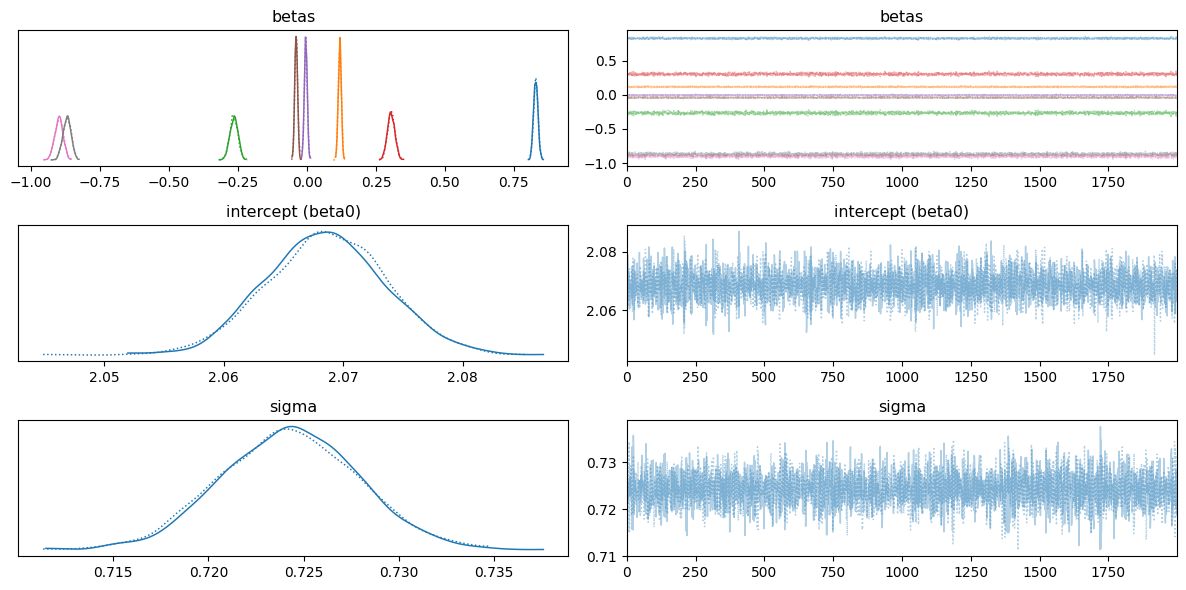

In [14]:
# Plot diagnostics: trace plots and posterior summaries
az.plot_trace(trace_lin)
plt.tight_layout()
plt.show()

In [16]:
print(data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


**California Housing dataset**

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target. The target variable contains the **median** of the house value for each district in California, expressed in hundreds of thousands of US dollars ($100,000).

Attribute Information:
* *MedInc*        median income in block group
* *HouseAge*      median house age in block group
* *AveRooms*      average number of rooms per household
* *AveBedrms*     average number of bedrooms per household
* *Population*    block group population
* *AveOccup*      average number of household members
* *Latitude*      block group latitude
* *Longitude*     block group longitude

In this analysis, each $\beta$ represents the estimated effect of a standardized predictor on the median house value in the California Housing Dataset. For example, $\beta_1 = 0.83$ (note this corresponds to beta[0] in the summary table due to Python starting indexing from 0) indicates that, holding all other predictors constant, a one standard deviation increase in the first predictor *MedInc* (median income in block group) is associated with an average increase of $0.83 \times 100,000$ USD in the median house value for the district, after accounting for the intercept $\beta_0$ and other covariates. The reported posterior means are accompanied by very tight 94% highest density intervals (HDI, e.g., 0.81 to 0.84 for $\beta_1$), reflecting high certainty in these estimates. Furthermore, the Monte Carlo standard errors (MCSE) are effectively zero, and both bulk and tail effective sample sizes are high (e.g., over 2400 for $\beta_0$), while the convergence diagnostic $\hat{R}$ is exactly 1.0 for all parameters. These MCMC diagnostics indicate that the sampling has converged reliably and that the posterior inferences are robust. Overall, the Bayesian posterior analysis provides strong evidence for the effect sizes and directions of the predictors on housing prices, with precise estimates and sound MCMC performance.

### Q2 Optional Extra Answer

For the sake of this prompt, I will discretize the response variable $y$ using a simple scheme: just round to the nearest integer. Then we use a Poisson likelihood and a log link function.

In [34]:
data = fetch_california_housing()
X = data.data  # shape (n, p)

# Discretize the continuous target
y_cont = data.target
y_discrete = np.round(y_cont).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

with pm.Model() as glm_model:
    p = X_scaled.shape[1]
    # Priors for regression coefficients and intercept:
    betas = pm.Normal("betas", mu=0, sigma=10, shape=p)
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    # Linear predictor:
    mu = intercept + pm.math.dot(X_scaled, betas)

    # Link function: for a Poisson likelihood we use the log link:
    lambda_ = pm.math.exp(mu)

    # Likelihood: assume y_count are Poisson distributed:
    y_obs = pm.Poisson("y_obs", mu=lambda_, observed=y_discrete)

    # Sample from the posterior:
    trace_glm = pm.sample(2000, tune=1000, return_inferencedata=True, cores=2)



Output()

In [35]:
az.summary(trace_glm, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.26,0.01,0.25,0.27,0.0,0.0,2102.24,1924.04,1.0
betas[1],0.04,0.01,0.03,0.05,0.0,0.0,3757.82,3124.82,1.0
betas[2],-0.04,0.01,-0.06,-0.01,0.0,0.0,1933.17,1984.23,1.0
betas[3],0.06,0.01,0.04,0.08,0.0,0.0,2001.33,2444.89,1.0
betas[4],0.00,0.01,-0.01,0.01,0.0,0.0,4281.70,3028.17,1.0
betas[5],-0.05,0.02,-0.08,-0.01,0.0,0.0,3788.33,1943.81,1.0
betas[6],-0.62,0.02,-0.66,-0.59,0.0,0.0,2622.96,2624.53,1.0
betas[7],-0.58,0.02,-0.61,-0.55,0.0,0.0,2658.22,2843.82,1.0
intercept,0.66,0.01,0.65,0.67,0.0,0.0,4469.19,2722.82,1.0


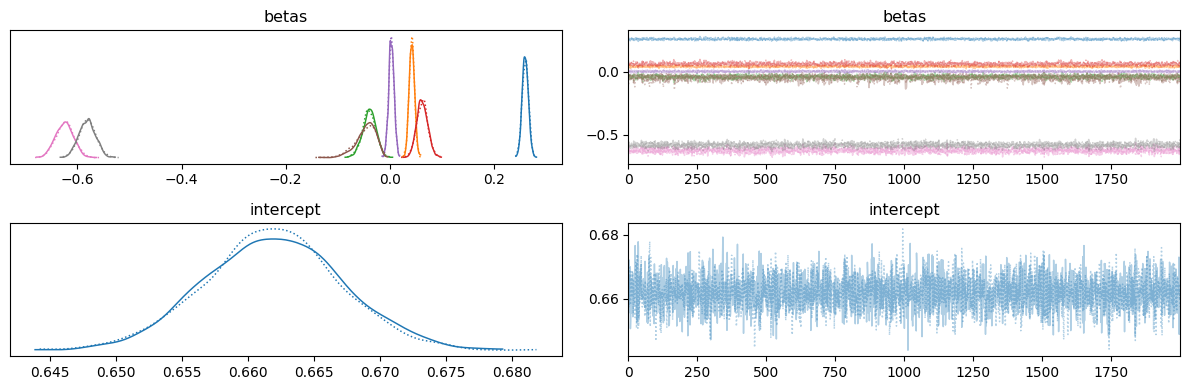

In [36]:
# Diagnostics:
az.plot_trace(trace_glm)
plt.tight_layout()
plt.show()

## Q3: perform robust Bayesian Linear Regression

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be ${N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$.

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers"
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distributions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics



## Q3 Answer

In [19]:
# Load California Housing dataset
data = fetch_california_housing()
X = data.data  # shape (20640, 8)
y = data.target  # median house value

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Introduce outliers: add a large offset to 5% of the observations in y
n = len(y)
n_outliers = int(0.05 * n)
outlier_indices = np.random.choice(n, n_outliers, replace=False)
y_robust = y.copy()
y_robust[outlier_indices] += 10 * y.std()  # add 10 standard deviations

# Robust Bayesian Linear Regression Model
with pm.Model() as robust_model:
    p = X_scaled.shape[1]
    # Priors for regression coefficients and intercept
    betas = pm.Normal("betas", mu=0, sigma=10, shape=p)
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    # Global precision (inverse variance) parameter
    tau = pm.HalfNormal("tau", sigma=10)

    # Degrees of freedom (or a parameter controlling tail heaviness)
    nu = pm.Exponential("nu", 1/30) + 1  # ensures nu > 1

    # Observation-specific scaling factors (local precisions)
    lam = pm.Gamma("lam", alpha=nu/2, beta=nu/2, shape=n)

    # Observation-specific standard deviations:
    # sigma_i = 1/sqrt(tau * lam_i)
    sigma_i = 1 / pm.math.sqrt(tau * lam)

    # Expected value of outcome
    mu = intercept + pm.math.dot(X_scaled, betas)

    # Likelihood with observation-specific error scales
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma_i, observed=y_robust)

    # Sample from the posterior
    trace_robust = pm.sample(2000, tune=1000, return_inferencedata=True, cores=2)

Output()

In [20]:
az.summary(trace_robust, var_names=["betas", "intercept", "tau", "nu"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.89,0.01,0.87,0.91,0.0,0.0,1405.97,1779.11,1.0
betas[1],0.10,0.00,0.09,0.11,0.0,0.0,2300.05,2617.99,1.0
betas[2],-0.36,0.01,-0.39,-0.33,0.0,0.0,1520.86,2165.74,1.0
betas[3],0.42,0.02,0.39,0.45,0.0,0.0,1459.69,2237.70,1.0
betas[4],0.04,0.00,0.03,0.04,0.0,0.0,2801.44,2718.91,1.0
betas[5],-2.36,0.06,-2.47,-2.26,0.0,0.0,2403.41,2288.06,1.0
betas[6],-0.74,0.01,-0.76,-0.71,0.0,0.0,1688.01,2295.98,1.0
betas[7],-0.71,0.01,-0.73,-0.68,0.0,0.0,1720.11,2408.45,1.0
intercept,1.91,0.00,1.90,1.92,0.0,0.0,2196.97,2918.46,1.0
tau,6.95,0.14,6.67,7.22,0.0,0.0,963.89,1667.94,1.0


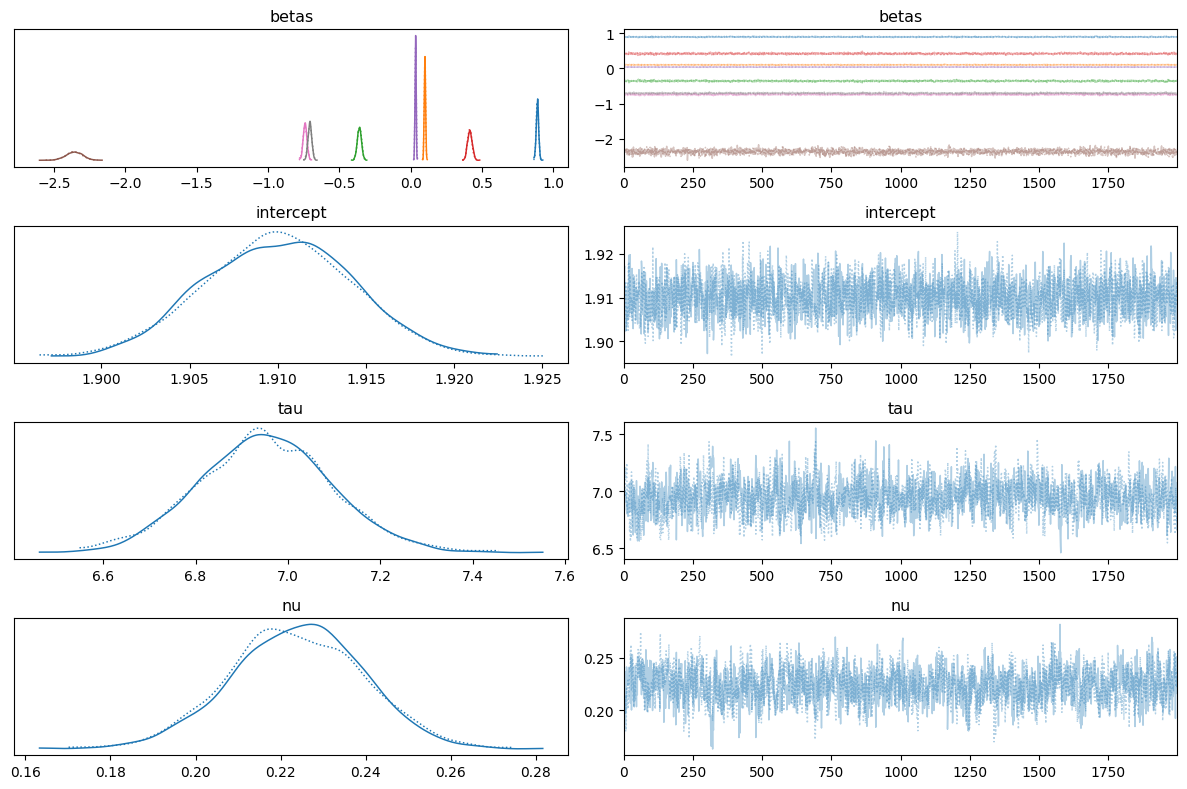

In [23]:
# Plot diagnostics for key parameters
az.plot_trace(trace_robust, var_names=["betas", "intercept", "tau", "nu"])
plt.tight_layout()
plt.show()

In [37]:
# Analyze the latent scaling factors (lam) to identify outliers
lam_means = trace_robust.posterior["lam"].mean(dim=["chain", "draw"]).values

import numpy as np
import pandas as pd
n = len(lam_means)
p = X_scaled.shape[1]

# If feature names are available (e.g., from the California Housing dataset), use them;
# otherwise, create generic feature names.
try:
    feature_names = data.feature_names
except Exception:
    feature_names = [f"X{i+1}" for i in range(p)]

# Create a DataFrame for the predictor variables.
df_predictors = pd.DataFrame(X_scaled, columns=feature_names)

# Create a DataFrame for the basic info: observation index, y, and lam.
df_info = pd.DataFrame({
    "Index": np.arange(n),
    "y (observed)": y_robust,
    "Posterior Mean of lam": lam_means
})

# Concatenate the predictor variables to the basic info DataFrame.
df_full = pd.concat([df_info, df_predictors], axis=1)

# Sort the indices by lam_means (ascending order)
sorted_indices = np.argsort(lam_means)

# Select 5 potential outliers (lowest lam values) and 5 normal candidates (highest lam values)
outlier_indices = sorted_indices[:5]
normal_indices = sorted_indices[-5:]

# Extract the rows corresponding to these indices
df_outliers = df_full.loc[outlier_indices]
df_normals = df_full.loc[normal_indices]

print("=== Outlier Data (5 observations with lowest lam values) ===")
print(df_outliers)

print("\n=== Normal Data (5 observations with highest lam values) ===")
print(df_normals)


=== Outlier Data (5 observations with lowest lam values) ===
       Index  y (observed)  Posterior Mean of lam    MedInc  HouseAge  \
19006  19006         1.375               0.000004  3.345515  1.299975   
3364    3364         0.675               0.000018  0.867065  0.584852   
16669  16669         3.500               0.000024  0.206987  1.379433   
13034  13034         2.250               0.000124  1.192367  1.856182   
9172    9172         1.546               0.001043  0.193933 -1.878348   

       AveRooms  AveBedrms  Population    AveOccup  Latitude  Longitude  
19006 -0.914402  -0.555691    5.328805  119.419103  1.258550  -1.203053  
3364  -0.115655   0.097451    2.448285   57.448030  2.237060  -0.469330  
16669  1.474437   0.445278    4.509331   48.084017 -0.146009  -0.564165  
13034  1.150660   0.887459    4.635608   21.866568  1.431779  -0.788774  
9172  -0.123353  -0.344676    6.452931    7.712530 -0.543968   0.489001  

=== Normal Data (5 observations with highest lam values

**California Housing dataset**

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target. The target variable contains the **median** of the house value for each district in California, expressed in hundreds of thousands of US dollars ($100,000).

Attribute Information:
* *MedInc*        median income in block group
* *HouseAge*      median house age in block group
* *AveRooms*      average number of rooms per household
* *AveBedrms*     average number of bedrooms per household
* *Population*    block group population
* *AveOccup*      average number of household members
* *Latitude*      block group latitude
* *Longitude*     block group longitude


Note that outliers are the 5% of datapoints with the lowest lambda values. For an arbitrary comparison, we can see that in the outliers, the Median Income, which is the most positively correlated variable with the target (median house value for the district) according to our Bayesian inference provided above, seems to be not necessarily correlated in the outliers (high median income does not seem to equal high target value), whereas for the typical 5 points, it does seem to be correlated.

As for the overall Bayesian inference, we can see that the 94% credible intervals for each of the betas are sometimes in different regions and maybe slightly wider than they are in Question 2. More importantly, the ESS for many of the variables has shrinked significantly.

#### [Optional] Q3 Extra: measurement error models?

What if $\textbf{x}_i = \textbf{x}_i^{true} + \eta_i, \eta_i \sim {MVN}(\textbf{0}, \Sigma)$ for some kind of measurement error covariance structure $\Sigma$ and $ N (y_i| \textbf{X}^{true}\boldsymbol \beta, \sigma)$?